In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
from matplotlib.ticker import FuncFormatter
import matplotlib.font_manager as fm

# Set academic style parameters
plt.style.use('default')  # Reset to default style

# Create a custom style for academic publishing
academic_style = {
    'figure.figsize': (8, 6),  # Slightly larger for better readability
    'font.family': 'serif',
    'font.serif': ['Times New Roman', 'Computer Modern Roman', 'DejaVu Serif'],
    'font.size': 12,
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'legend.frameon': True,
    'legend.framealpha': 0.9,
    'grid.alpha': 0.3,
    'grid.linestyle': ':',
    'lines.linewidth': 2.5,
    'lines.markersize': 8,
}

# Apply the style
plt.rcParams.update(academic_style)

# Define a color palette suitable for academic publications (print-friendly)
academic_palette = {
    'mysql': '#1f77b4',      # blue
    'elk': '#d62728',        # red
    'ipfs': '#2ca02c',       # green
    'static': '#9467bd',     # purple
    'q_learning': '#ff7f0e', # orange
    'a2c': '#8c564b',        # brown
    'direct': '#7f7f7f'      # gray
}

# Define consistent labels for routers
router_labels = {
    'direct_mysql': 'Direct MySQL',
    'direct_elk': 'Direct ELK',
    'direct_ipfs': 'Direct IPFS',
    'static': 'Static Routing',
    'q_learning': 'Q-Learning',  # Fixed label
    'a2c': 'A2C'
}

# Define line styles for better distinction in print
line_styles = {
    'mysql': '-',
    'elk': '--',
    'ipfs': '-.',
    'static': ':',
    'q_learning': (0, (3, 1, 1, 1)),
    'a2c': (0, (5, 5)),
    'direct': (0, (1, 1))
}

# Define marker styles
marker_styles = {
    'mysql': 'o',
    'elk': 's',
    'ipfs': '^',
    'static': 'D',
    'q_learning': 'v',
    'a2c': '<',
    'direct': '>'
}

1. Data Loading and Preparation

In [2]:
# Load all summary files
summary_files = glob.glob('./results/summary_*.csv')
summary_dfs = []

for file in summary_files:
    try:
        # Extract router and dataset name from filename
        filename = os.path.basename(file)
        parts = filename.replace('summary_', '').replace('.csv', '').split('_')
        
        if parts[0] == 'direct':
            router = f"direct_{parts[1]}"
            dataset = '_'.join(parts[2:])
        else:
            router = parts[0]
            # Handle special case for q_learning
            if router == 'q':
                router = 'q_learning'
                dataset = '_'.join(parts[2:]) if len(parts) > 2 else parts[1]
            else:
                dataset = '_'.join(parts[1:])
        
        df = pd.read_csv(file)
        df['router_type'] = router
        df['dataset_name'] = dataset
        summary_dfs.append(df)
    except Exception as e:
        print(f"Error processing {file}: {e}")

# Combine all summary data
summary_df = pd.concat(summary_dfs, ignore_index=True)

# Load all experiment detail files
exp_files = glob.glob('./results/*_*.csv')
exp_files = [f for f in exp_files if not f.startswith('./results/summary_')]

exp_dfs = []
for file in exp_files:
    try:
        # Extract router and dataset name from filename
        filename = os.path.basename(file)
        parts = filename.replace('.csv', '').split('_')
        
        if parts[0] == 'direct':
            router = f"direct_{parts[1]}"
            dataset = '_'.join(parts[2:])
        else:
            router = parts[0]
            # Handle special case for q_learning
            if router == 'q':
                router = 'q_learning'
                dataset = '_'.join(parts[2:]) if len(parts) > 2 else parts[1]
            else:
                dataset = '_'.join(parts[1:])
        
        df = pd.read_csv(file)
        df['router_type'] = router
        df['dataset_name'] = dataset
        exp_dfs.append(df)
    except Exception as e:
        print(f"Error processing {file}: {e}")

# Combine all experiment data
exp_df = pd.concat(exp_dfs, ignore_index=True)

# Display basic information about the data
print("Summary Data Shape:", summary_df.shape)
print("Experiment Data Shape:", exp_df.shape)
print("\nRouter Types:", summary_df['router_type'].unique())
print("Datasets:", summary_df['dataset_name'].unique())

# Check for any missing data
print("\nMissing values in summary data:")
print(summary_df.isnull().sum())

Summary Data Shape: (12, 10)
Experiment Data Shape: (1284006, 29)

Router Types: ['static' 'q_learning' 'a2c' 'direct_ipfs' 'direct_elk' 'direct_mysql']
Datasets: ['Loghub-zenodo_Logs' 'Synthetic_Datacenter_Logs']

Missing values in summary data:
router                     0
dataset_name               0
LogsProcessed              0
TotalEnergyWh              0
EnergyPerLogWh             0
CarbonEmissionsKg          0
AvgLatencyMs               0
ThroughputLogsPerSec       0
EmissionsFactorKgPerKWh    0
router_type                0
dtype: int64


2. Comparative Trade-offs Analysis
2.1 Performance (Latency vs Throughput)

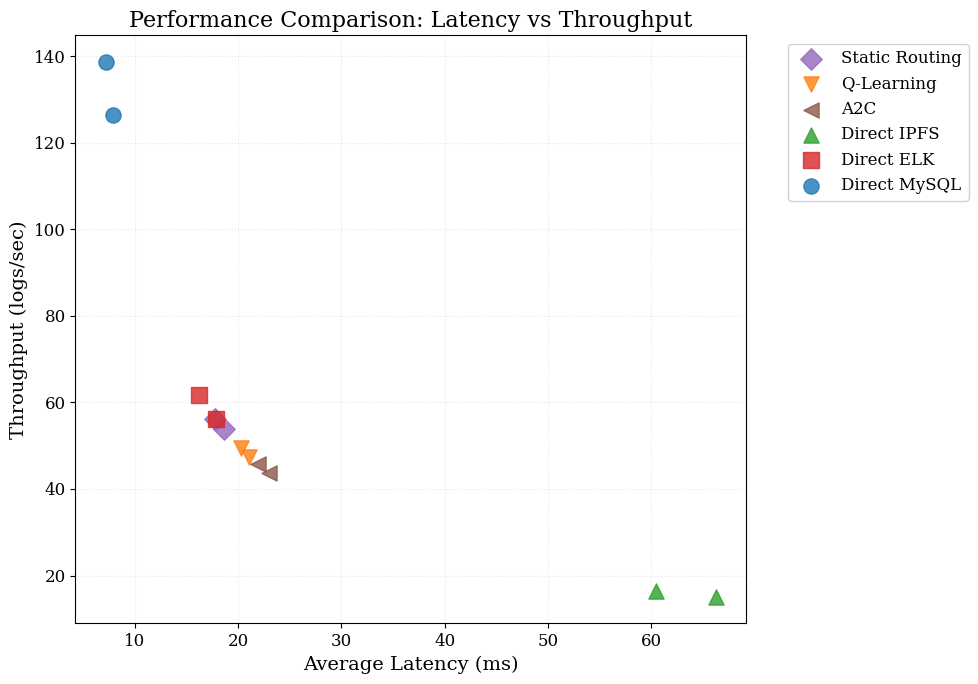

In [3]:
# Create a scatter plot of latency vs throughput with academic style
fig, ax = plt.subplots(figsize=(10, 7))

for router in summary_df['router_type'].unique():
    router_data = summary_df[summary_df['router_type'] == router]
    
    # Get the base name for styling
    base_name = router.split('_')[-1] if 'direct' in router else router
    
    ax.scatter(
        router_data['AvgLatencyMs'], 
        router_data['ThroughputLogsPerSec'],
        label=router_labels.get(router, router),
        s=120,
        alpha=0.8,
        color=academic_palette.get(base_name, '#7f7f7f'),
        marker=marker_styles.get(base_name, 'o')
    )

ax.set_xlabel('Average Latency (ms)')
ax.set_ylabel('Throughput (logs/sec)')
ax.set_title('Performance Comparison: Latency vs Throughput')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3)

# Use scientific notation if needed
if max(summary_df['AvgLatencyMs']) > 1000:
    ax.ticklabel_format(style='scientific', axis='x', scilimits=(0,0))
if max(summary_df['ThroughputLogsPerSec']) > 1000:
    ax.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))

plt.tight_layout()
plt.savefig('performance_comparison.png', dpi=300, bbox_inches='tight')
plt.savefig('performance_comparison.pdf', bbox_inches='tight')
plt.show()

2.2 Energy Efficiency Comparison

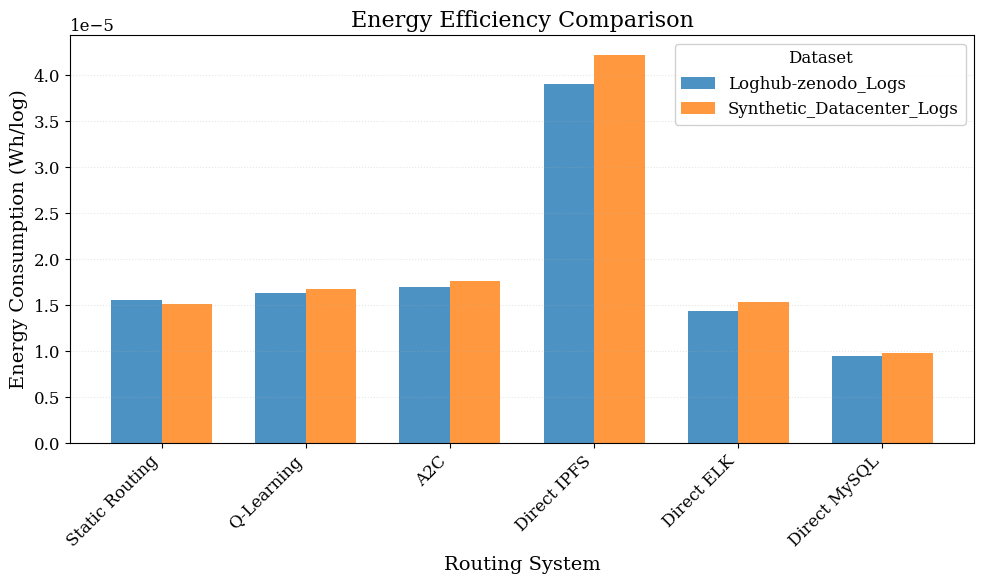

/tmp/ipykernel_1124204/560140422.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


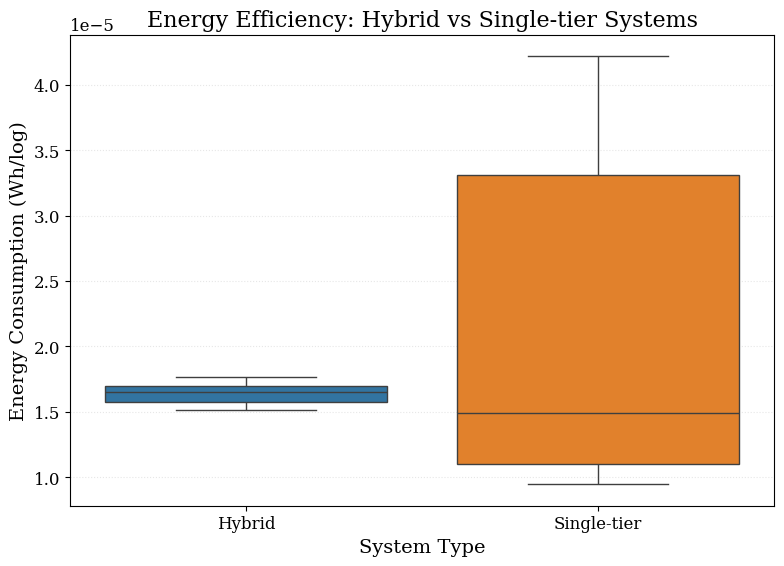

In [4]:
# Prepare data for energy efficiency comparison
energy_data = summary_df[['router_type', 'dataset_name', 'EnergyPerLogWh']].copy()
energy_data['System Type'] = energy_data['router_type'].apply(
    lambda x: 'Single-tier' if 'direct' in x else 'Hybrid'
)

# Create bar plot with academic style
fig, ax = plt.subplots(figsize=(10, 6))

# Get unique routers and datasets
routers = energy_data['router_type'].unique()
datasets = energy_data['dataset_name'].unique()
x = np.arange(len(routers))
width = 0.35

# Create bars for each dataset
for i, dataset in enumerate(datasets):
    dataset_values = []
    for router in routers:
        value = energy_data[(energy_data['router_type'] == router) & 
                           (energy_data['dataset_name'] == dataset)]['EnergyPerLogWh'].values
        dataset_values.append(value[0] if len(value) > 0 else 0)
    
    ax.bar(x + i*width, dataset_values, width, label=dataset, alpha=0.8)

ax.set_xlabel('Routing System')
ax.set_ylabel('Energy Consumption (Wh/log)')
ax.set_title('Energy Efficiency Comparison')
ax.set_xticks(x + width/2)
ax.set_xticklabels([router_labels.get(r, r) for r in routers], rotation=45, ha='right')
ax.legend(title='Dataset')
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('energy_efficiency.png', dpi=300, bbox_inches='tight')
plt.savefig('energy_efficiency.pdf', bbox_inches='tight')
plt.show()

# Create box plot for hybrid vs single-tier comparison
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(
    data=energy_data, 
    x='System Type', 
    y='EnergyPerLogWh',
    palette=['#1f77b4', '#ff7f0e'],
    ax=ax
)

ax.set_xlabel('System Type')
ax.set_ylabel('Energy Consumption (Wh/log)')
ax.set_title('Energy Efficiency: Hybrid vs Single-tier Systems')
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('energy_efficiency_comparison.png', dpi=300, bbox_inches='tight')
plt.savefig('energy_efficiency_comparison.pdf', bbox_inches='tight')
plt.show()

3. Scaling Behavior Analysis
3.1 Scaling of Latency with Workload Size

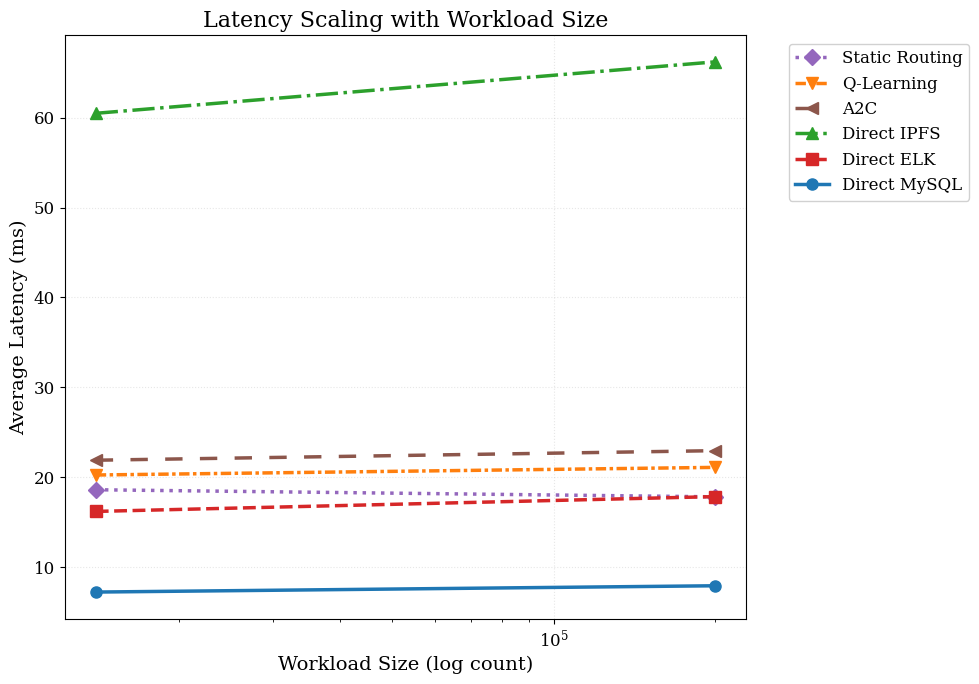

In [5]:
# Prepare data for latency scaling analysis
latency_data = summary_df[['router_type', 'dataset_name', 'AvgLatencyMs']].copy()

# Map dataset names to log counts
dataset_sizes = {
    'Loghub-zenodo_Logs': 14000,
    'Synthetic_Datacenter_Logs': 200000
}

latency_data['Log Count'] = latency_data['dataset_name'].map(dataset_sizes)

# Create line plot for latency scaling with academic style
fig, ax = plt.subplots(figsize=(10, 7))

for router in latency_data['router_type'].unique():
    router_data = latency_data[latency_data['router_type'] == router].sort_values('Log Count')
    base_name = router.split('_')[-1] if 'direct' in router else router
    
    ax.plot(
        router_data['Log Count'], 
        router_data['AvgLatencyMs'],
        marker=marker_styles.get(base_name, 'o'),
        label=router_labels.get(router, router),
        linewidth=2.5,
        color=academic_palette.get(base_name, '#7f7f7f'),
        linestyle=line_styles.get(base_name, '-')
    )

ax.set_xscale('log')
ax.set_xlabel('Workload Size (log count)')
ax.set_ylabel('Average Latency (ms)')
ax.set_title('Latency Scaling with Workload Size')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('latency_scaling.png', dpi=300, bbox_inches='tight')
plt.savefig('latency_scaling.pdf', bbox_inches='tight')
plt.show()

3.2 Throughput Saturation with Increasing Workload

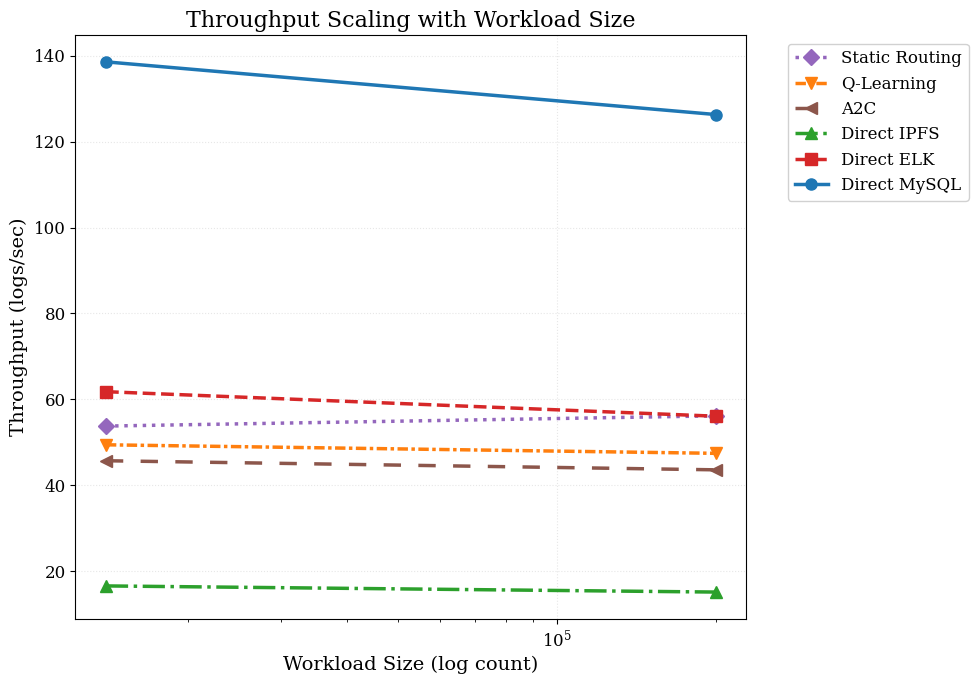

In [6]:
# Prepare data for throughput analysis
throughput_data = summary_df[['router_type', 'dataset_name', 'ThroughputLogsPerSec']].copy()
throughput_data['Log Count'] = throughput_data['dataset_name'].map(dataset_sizes)

# Create line plot for throughput with academic style
fig, ax = plt.subplots(figsize=(10, 7))

for router in throughput_data['router_type'].unique():
    router_data = throughput_data[throughput_data['router_type'] == router].sort_values('Log Count')
    base_name = router.split('_')[-1] if 'direct' in router else router
    
    ax.plot(
        router_data['Log Count'], 
        router_data['ThroughputLogsPerSec'],
        marker=marker_styles.get(base_name, 'o'),
        label=router_labels.get(router, router),
        linewidth=2.5,
        color=academic_palette.get(base_name, '#7f7f7f'),
        linestyle=line_styles.get(base_name, '-')
    )

ax.set_xscale('log')
ax.set_xlabel('Workload Size (log count)')
ax.set_ylabel('Throughput (logs/sec)')
ax.set_title('Throughput Scaling with Workload Size')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('throughput_scaling.png', dpi=300, bbox_inches='tight')
plt.savefig('throughput_scaling.pdf', bbox_inches='tight')
plt.show()

4. Adaptivity Under Workload Variation

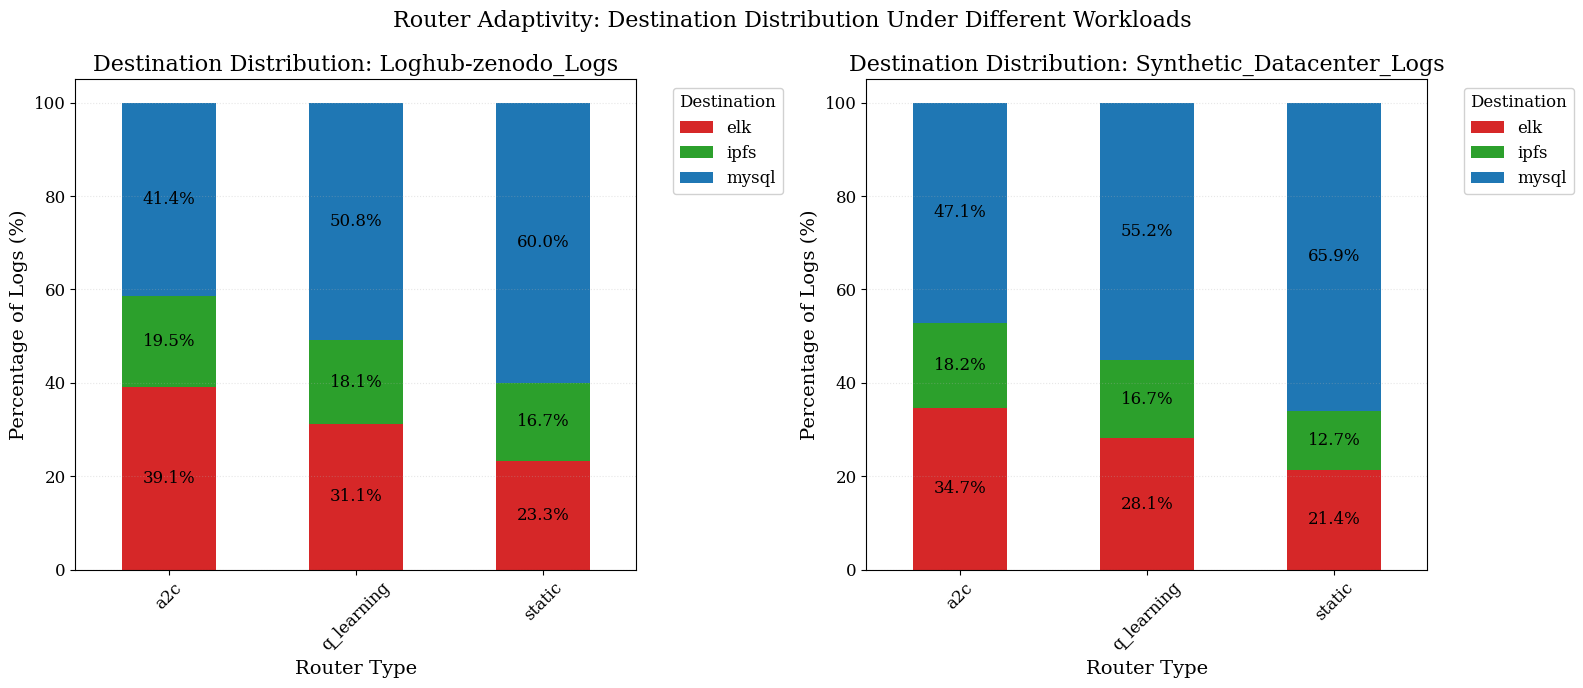

In [7]:
# Analyze destination distribution for adaptive routers
adaptive_routers = ['static', 'q_learning', 'a2c']
adaptive_data = exp_df[exp_df['router_type'].isin(adaptive_routers)]

# Calculate destination distribution for each router and dataset
dest_distribution = adaptive_data.groupby(['router_type', 'dataset_name', 'destination']).size().reset_index(name='count')
total_counts = dest_distribution.groupby(['router_type', 'dataset_name'])['count'].transform('sum')
dest_distribution['percentage'] = dest_distribution['count'] / total_counts * 100

# Create stacked bar chart with academic style
fig, axes = plt.subplots(1, 2, figsize=(16, 7))
datasets = dest_distribution['dataset_name'].unique()

for i, dataset in enumerate(datasets):
    dataset_data = dest_distribution[dest_distribution['dataset_name'] == dataset]
    
    # Pivot the data for stacked bar chart
    pivot_data = dataset_data.pivot_table(
        index='router_type', 
        columns='destination', 
        values='percentage', 
        aggfunc='sum'
    ).fillna(0)
    
    # Get the colors for the destinations
    colors = [academic_palette.get(dest, '#7f7f7f') for dest in pivot_data.columns]
    
    # Plot
    bars = pivot_data.plot(
        kind='bar', 
        stacked=True, 
        ax=axes[i],
        color=colors
    )
    
    axes[i].set_title(f'Destination Distribution: {dataset}')
    axes[i].set_xlabel('Router Type')
    axes[i].set_ylabel('Percentage of Logs (%)')
    axes[i].legend(title='Destination', bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True, alpha=0.3, axis='y')
    
    # Add value labels on the bars
    for container in bars.containers:
        bars.bar_label(container, fmt='%.1f%%', label_type='center')

plt.suptitle('Router Adaptivity: Destination Distribution Under Different Workloads', fontsize=16)
plt.tight_layout()
plt.savefig('router_adaptivity.png', dpi=300, bbox_inches='tight')
plt.savefig('router_adaptivity.pdf', bbox_inches='tight')
plt.show()

5. Design Levers and Parameter Sensitivity
Note: This section assumes that you have parameter variation data. If not, you might need to collect additional data.

In [8]:
# If you have parameter variation data, you can create heatmaps or line plots
# For example, if you have multiple runs with different reward weights:

# This is a placeholder - you would need to replace with your actual parameter data
parameter_data = []

# Example for Q-learning discretization sensitivity
if parameter_data:
    # Create a heatmap for parameter sensitivity
    param_pivot = parameter_data.pivot_table(
        index='discretization_level', 
        columns='reward_weight', 
        values='AvgLatencyMs', 
        aggfunc='mean'
    )
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(param_pivot, annot=True, fmt=".1f", cmap="YlOrRd")
    plt.title('Q-learning Parameter Sensitivity: Average Latency')
    plt.xlabel('Reward Weight')
    plt.ylabel('Discretization Level')
    plt.tight_layout()
    plt.show()

# Example for A2C rollout length sensitivity
if parameter_data and 'rollout_length' in parameter_data.columns:
    rollout_data = parameter_data.groupby('rollout_length')['AvgLatencyMs'].mean().reset_index()
    
    plt.figure(figsize=(10, 6))
    plt.plot(rollout_data['rollout_length'], rollout_data['AvgLatencyMs'], marker='o')
    plt.xlabel('Rollout Length')
    plt.ylabel('Average Latency (ms)')
    plt.title('A2C Parameter Sensitivity: Rollout Length vs Latency')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

6. Additional Analysis: Tail Latency Comparison


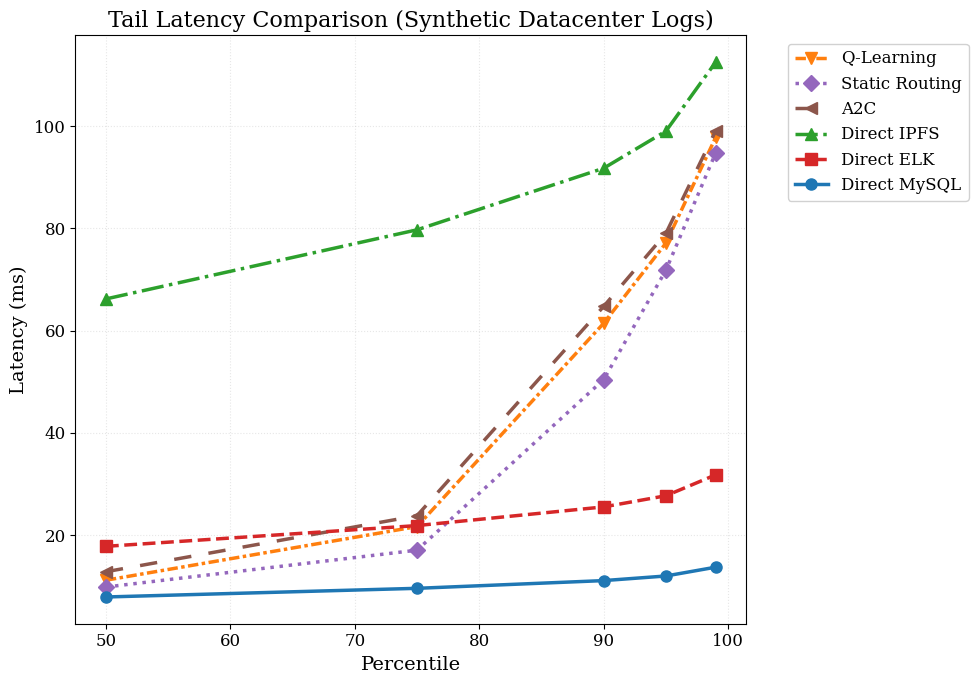

In [9]:
# Calculate percentile latencies for each router and dataset
percentiles = [50, 75, 90, 95, 99]
latency_metrics = []

for router in exp_df['router_type'].unique():
    for dataset in exp_df['dataset_name'].unique():
        router_data = exp_df[(exp_df['router_type'] == router) & (exp_df['dataset_name'] == dataset)]
        
        if len(router_data) > 0:
            for p in percentiles:
                latency_value = np.percentile(router_data['total_latency_ms'], p)
                latency_metrics.append({
                    'router_type': router,
                    'dataset_name': dataset,
                    'percentile': p,
                    'latency_ms': latency_value
                })

latency_metrics_df = pd.DataFrame(latency_metrics)

# Create tail latency comparison plot with academic style
fig, ax = plt.subplots(figsize=(10, 7))

for router in latency_metrics_df['router_type'].unique():
    router_data = latency_metrics_df[latency_metrics_df['router_type'] == router]
    dataset_data = router_data[router_data['dataset_name'] == 'Synthetic_Datacenter_Logs']  # Use larger dataset
    
    if len(dataset_data) > 0:
        base_name = router.split('_')[-1] if 'direct' in router else router
        
        ax.plot(
            dataset_data['percentile'], 
            dataset_data['latency_ms'],
            marker=marker_styles.get(base_name, 'o'),
            label=router_labels.get(router, router),
            linewidth=2.5,
            color=academic_palette.get(base_name, '#7f7f7f'),
            linestyle=line_styles.get(base_name, '-')
        )

ax.set_xlabel('Percentile')
ax.set_ylabel('Latency (ms)')
ax.set_title('Tail Latency Comparison (Synthetic Datacenter Logs)')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('tail_latency.png', dpi=300, bbox_inches='tight')
plt.savefig('tail_latency.pdf', bbox_inches='tight')
plt.show()

Summary and Key Findings


Summary of Key Performance Metrics:
                   AvgLatencyMs                               EnergyPerLogWh  \
dataset_name Loghub-zenodo_Logs Synthetic_Datacenter_Logs Loghub-zenodo_Logs   
router_type                                                                    
a2c                       21.88                     22.95                0.0   
direct_elk                16.19                     17.84                0.0   
direct_ipfs               60.48                     66.21                0.0   
direct_mysql               7.21                      7.91                0.0   
q_learning                20.24                     21.09                0.0   
static                    18.60                     17.81                0.0   

                                       ThroughputLogsPerSec  \
dataset_name Synthetic_Datacenter_Logs   Loghub-zenodo_Logs   
router_type                                                   
a2c                                0.0                

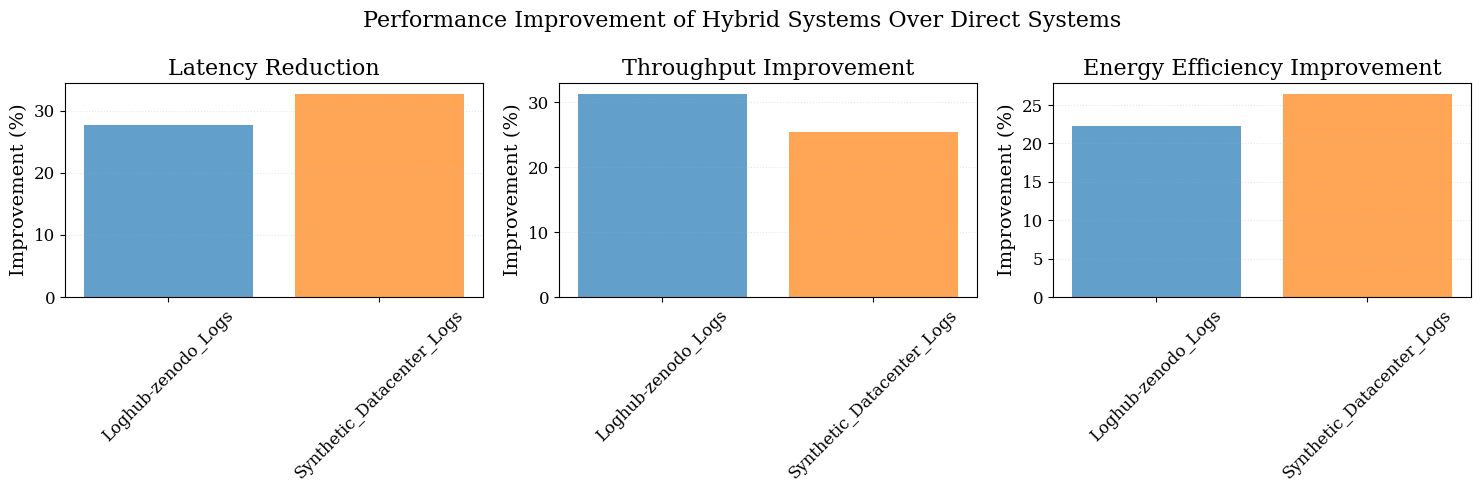

In [10]:
# Create a summary table of key metrics
summary_table = summary_df.pivot_table(
    index='router_type',
    columns='dataset_name',
    values=['AvgLatencyMs', 'ThroughputLogsPerSec', 'EnergyPerLogWh'],
    aggfunc='mean'
)

# Format the table for better readability
summary_table_formatted = summary_table.round(2)
print("Summary of Key Performance Metrics:")
print(summary_table_formatted)

# Calculate improvement percentages for hybrid systems vs direct systems
direct_metrics = summary_df[summary_df['router_type'].str.contains('direct')]
hybrid_metrics = summary_df[~summary_df['router_type'].str.contains('direct')]

direct_avg = direct_metrics.groupby('dataset_name')[['AvgLatencyMs', 'ThroughputLogsPerSec', 'EnergyPerLogWh']].mean()
hybrid_avg = hybrid_metrics.groupby('dataset_name')[['AvgLatencyMs', 'ThroughputLogsPerSec', 'EnergyPerLogWh']].mean()

improvement = (direct_avg - hybrid_avg) / direct_avg * 100
print("\nHybrid Systems Improvement Over Direct Systems (%):")
print(improvement.round(2))

# Create a visual summary of improvements
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
metrics = ['AvgLatencyMs', 'ThroughputLogsPerSec', 'EnergyPerLogWh']
metric_names = ['Latency Reduction', 'Throughput Improvement', 'Energy Efficiency Improvement']

for i, metric in enumerate(metrics):
    axes[i].bar(improvement.index, improvement[metric], 
                color=['#1f77b4', '#ff7f0e'], alpha=0.7)
    axes[i].set_title(metric_names[i])
    axes[i].set_ylabel('Improvement (%)')
    axes[i].grid(True, alpha=0.3, axis='y')
    axes[i].tick_params(axis='x', rotation=45)

plt.suptitle('Performance Improvement of Hybrid Systems Over Direct Systems', fontsize=16)
plt.tight_layout()
plt.savefig('improvement_summary.png', dpi=300, bbox_inches='tight')
plt.savefig('improvement_summary.pdf', bbox_inches='tight')
plt.show()